# Libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('LifeExpectancy.csv')


# Info from Data

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.columns = df.columns.str.strip()

# Univariate  Analysis

## Numerical Columns

Column of Year
The Statistical summary:
count    2938.000000
mean     2007.518720
std         4.613841
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name: Year, dtype: float64
-------------------------------------------------
The null values: 0
-------------------------------------------------
Skew: -0.0064090273593942005
-------------------------------------------------
The Distribution: 


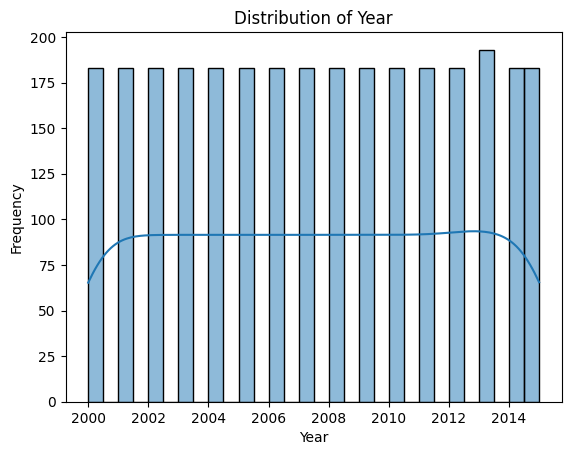

Column of Life expectancy
The Statistical summary:
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64
-------------------------------------------------
The null values: 10
-------------------------------------------------
Skew: -0.6386047358773552
-------------------------------------------------
The Distribution: 


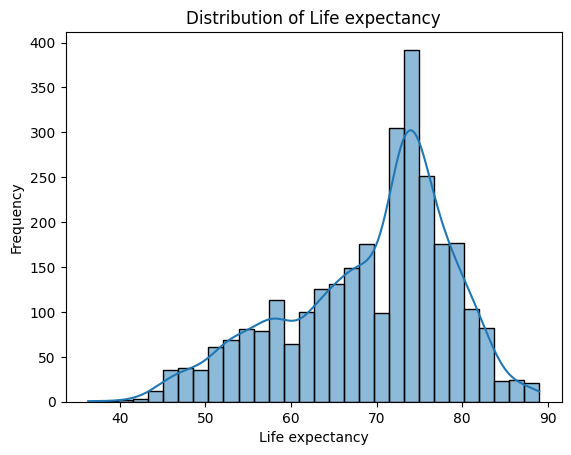

Column of Adult Mortality
The Statistical summary:
count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64
-------------------------------------------------
The null values: 10
-------------------------------------------------
Skew: 1.1743694876948636
-------------------------------------------------
The Distribution: 


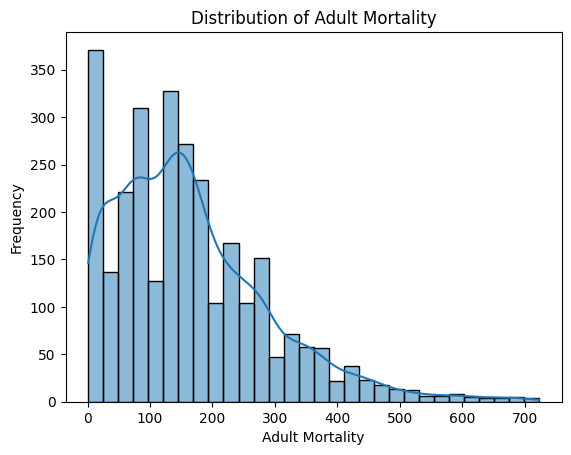

Column of infant deaths
The Statistical summary:
count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: infant deaths, dtype: float64
-------------------------------------------------
The null values: 0
-------------------------------------------------
Skew: 9.786962950426057
-------------------------------------------------
The Distribution: 


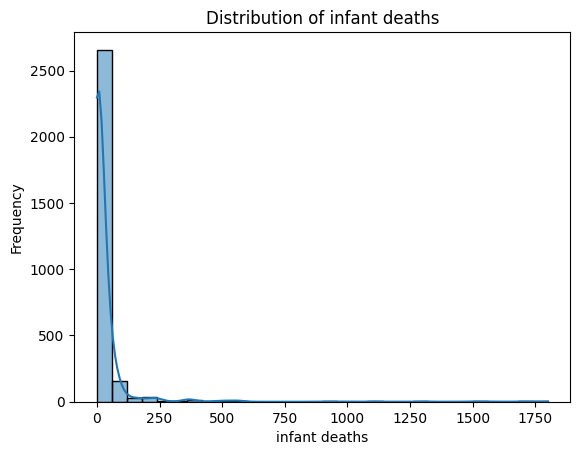

Column of Alcohol
The Statistical summary:
count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol, dtype: float64
-------------------------------------------------
The null values: 194
-------------------------------------------------
Skew: 0.5895625281160799
-------------------------------------------------
The Distribution: 


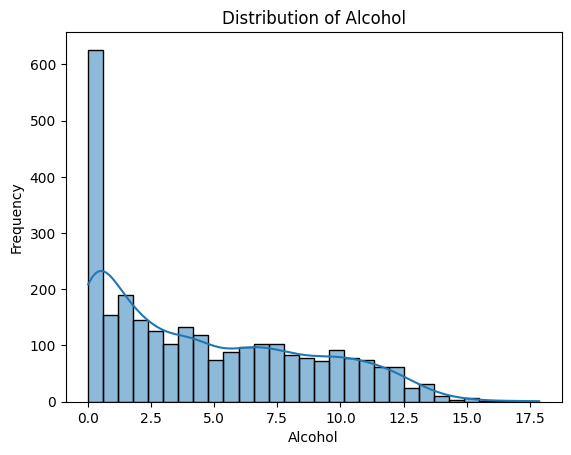

Column of percentage expenditure
The Statistical summary:
count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: percentage expenditure, dtype: float64
-------------------------------------------------
The null values: 0
-------------------------------------------------
Skew: 4.6520513478350605
-------------------------------------------------
The Distribution: 


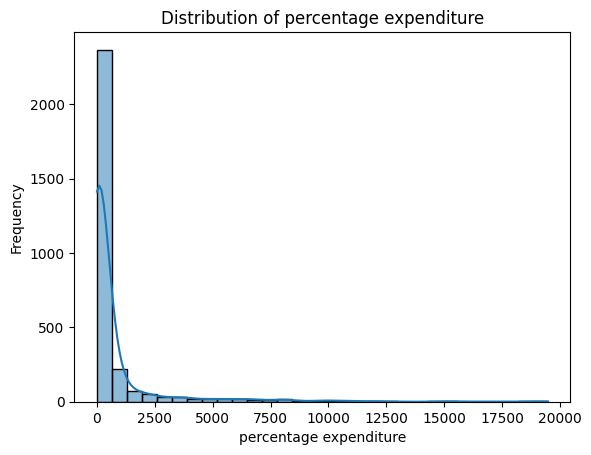

Column of Hepatitis B
The Statistical summary:
count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64
-------------------------------------------------
The null values: 553
-------------------------------------------------
Skew: -1.9308451037678318
-------------------------------------------------
The Distribution: 


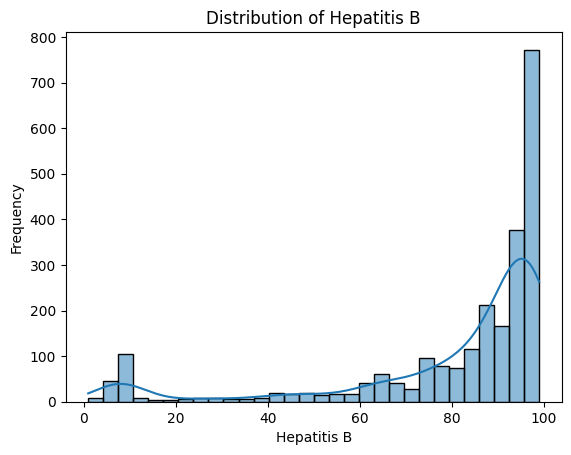

Column of Measles
The Statistical summary:
count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles, dtype: float64
-------------------------------------------------
The null values: 0
-------------------------------------------------
Skew: 9.441331947061583
-------------------------------------------------
The Distribution: 


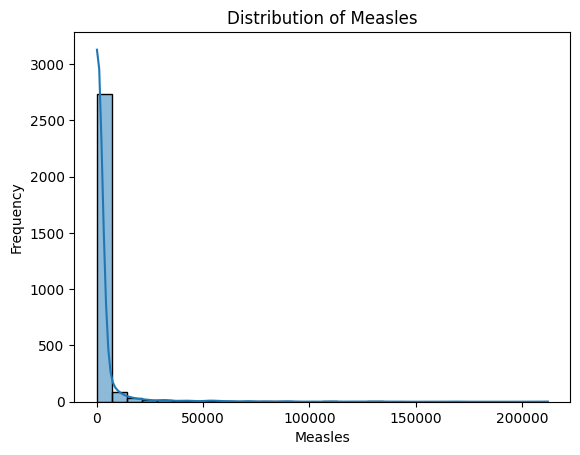

Column of BMI
The Statistical summary:
count    2904.000000
mean       38.321247
std        20.044034
min         1.000000
25%        19.300000
50%        43.500000
75%        56.200000
max        87.300000
Name: BMI, dtype: float64
-------------------------------------------------
The null values: 34
-------------------------------------------------
Skew: -0.219311603419775
-------------------------------------------------
The Distribution: 


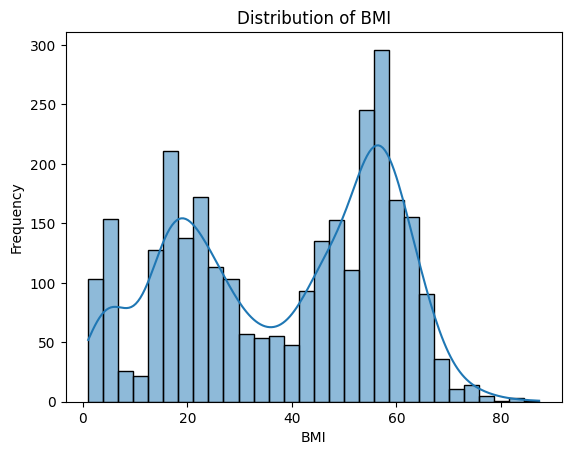

Column of under-five deaths
The Statistical summary:
count    2938.000000
mean       42.035739
std       160.445548
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: under-five deaths, dtype: float64
-------------------------------------------------
The null values: 0
-------------------------------------------------
Skew: 9.495064656961773
-------------------------------------------------
The Distribution: 


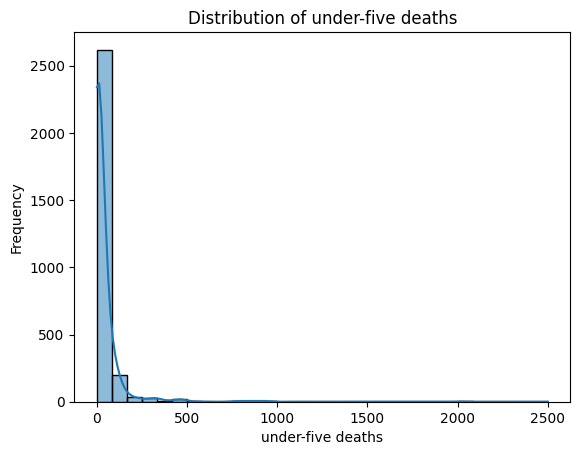

Column of Polio
The Statistical summary:
count    2919.000000
mean       82.550188
std        23.428046
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64
-------------------------------------------------
The null values: 19
-------------------------------------------------
Skew: -2.0980532489729056
-------------------------------------------------
The Distribution: 


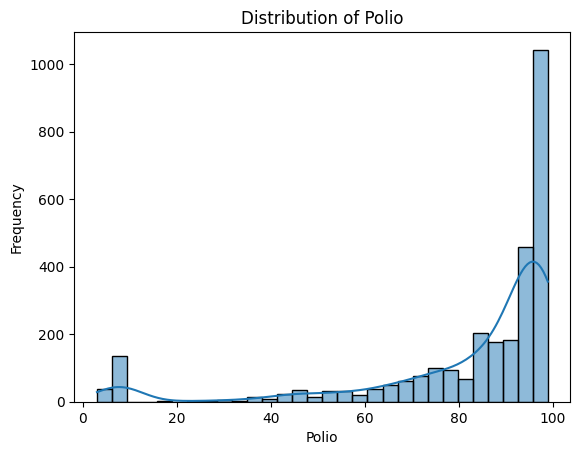

Column of Total expenditure
The Statistical summary:
count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total expenditure, dtype: float64
-------------------------------------------------
The null values: 226
-------------------------------------------------
Skew: 0.6186855520639749
-------------------------------------------------
The Distribution: 


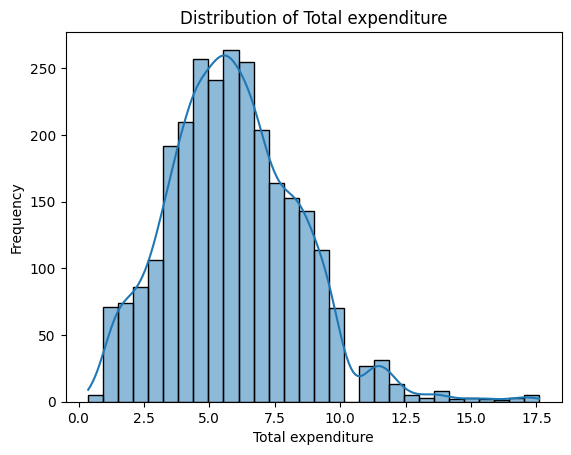

Column of Diphtheria
The Statistical summary:
count    2919.000000
mean       82.324084
std        23.716912
min         2.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria, dtype: float64
-------------------------------------------------
The null values: 19
-------------------------------------------------
Skew: -2.0727529292965605
-------------------------------------------------
The Distribution: 


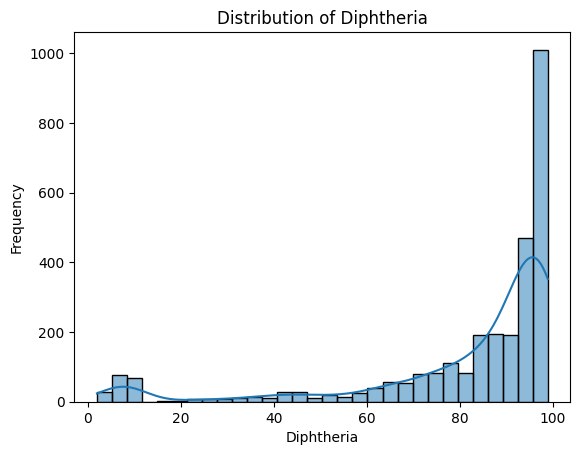

Column of HIV/AIDS
The Statistical summary:
count    2938.000000
mean        1.742103
std         5.077785
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.600000
Name: HIV/AIDS, dtype: float64
-------------------------------------------------
The null values: 0
-------------------------------------------------
Skew: 5.396112042126371
-------------------------------------------------
The Distribution: 


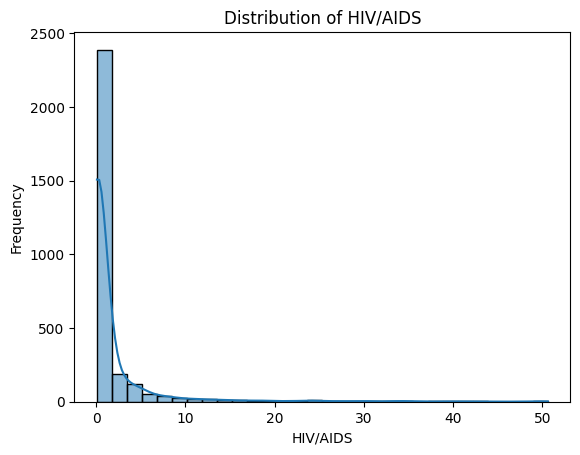

Column of GDP
The Statistical summary:
count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: GDP, dtype: float64
-------------------------------------------------
The null values: 448
-------------------------------------------------
Skew: 3.2066548698696393
-------------------------------------------------
The Distribution: 


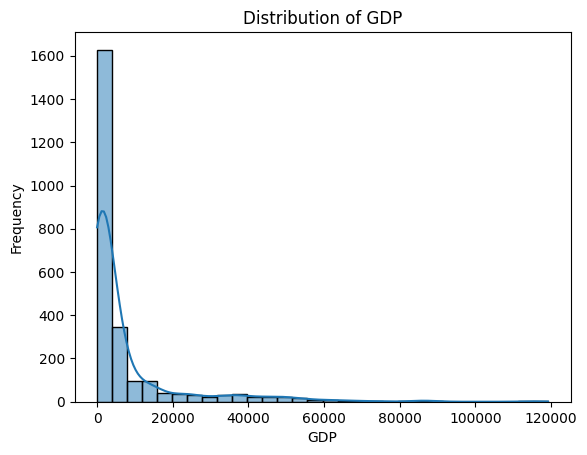

Column of Population
The Statistical summary:
count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64
-------------------------------------------------
The null values: 652
-------------------------------------------------
Skew: 15.916235598428203
-------------------------------------------------
The Distribution: 


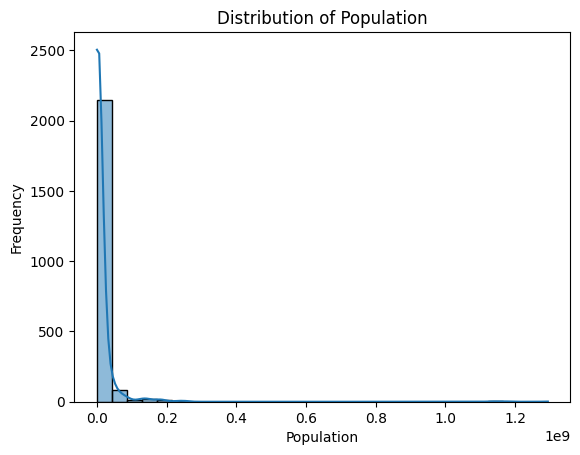

Column of thinness  1-19 years
The Statistical summary:
count    2904.000000
mean        4.839704
std         4.420195
min         0.100000
25%         1.600000
50%         3.300000
75%         7.200000
max        27.700000
Name: thinness  1-19 years, dtype: float64
-------------------------------------------------
The null values: 34
-------------------------------------------------
Skew: 1.7114710881233637
-------------------------------------------------
The Distribution: 


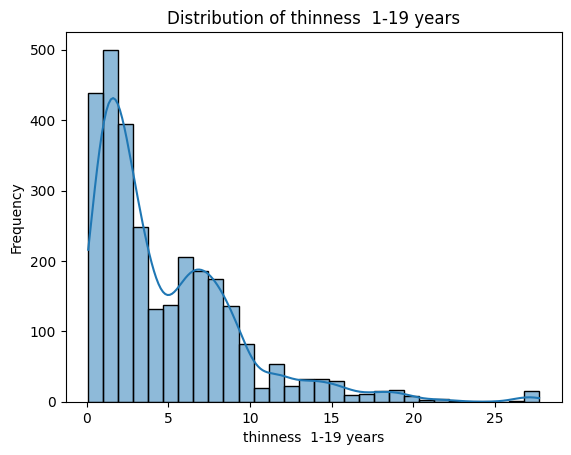

Column of thinness 5-9 years
The Statistical summary:
count    2904.000000
mean        4.870317
std         4.508882
min         0.100000
25%         1.500000
50%         3.300000
75%         7.200000
max        28.600000
Name: thinness 5-9 years, dtype: float64
-------------------------------------------------
The null values: 34
-------------------------------------------------
Skew: 1.777423977376571
-------------------------------------------------
The Distribution: 


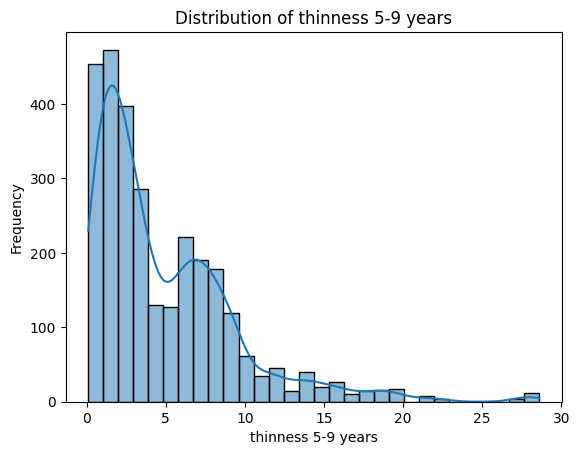

Column of Income composition of resources
The Statistical summary:
count    2771.000000
mean        0.627551
std         0.210904
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779000
max         0.948000
Name: Income composition of resources, dtype: float64
-------------------------------------------------
The null values: 167
-------------------------------------------------
Skew: -1.143762720185521
-------------------------------------------------
The Distribution: 


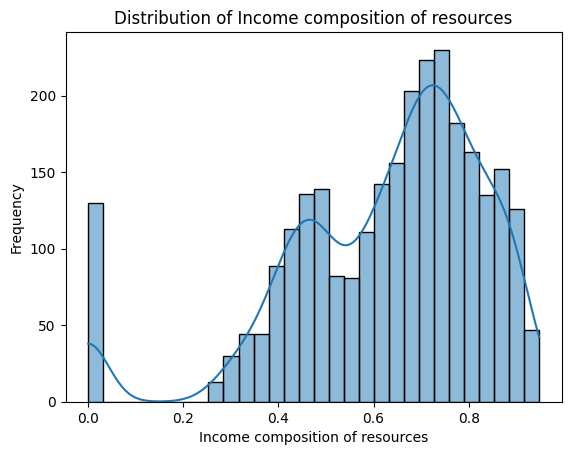

Column of Schooling
The Statistical summary:
count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64
-------------------------------------------------
The null values: 163
-------------------------------------------------
Skew: -0.6024365418785147
-------------------------------------------------
The Distribution: 


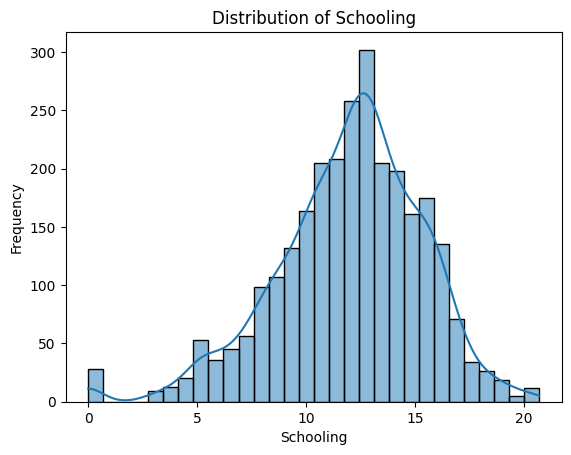

In [9]:
for column in df.columns:   
    if df[column].dtype!='object':
        print(f'Column of {column}')
        print("The Statistical summary:") 
        print(df[column].describe())
        print("-------------------------------------------------")
        print("The null values:", df[column].isnull().sum())
        print("-------------------------------------------------")
        print("Skew:",df[column].skew()) 
        print("-------------------------------------------------")
        print ("The Distribution: ")
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

- The Year Column is a discrete numerical column
- Adulti Mortality,Infant,Alcohol,Percentage expenditure,Measles,under-five deaths,HIV/AIDS,GDP,and Population are very right skewed 
- Hepatitis B,Polio,Diphtheria are very left skewed
- Total expenditure and life expectancy are right skewed 
- Schooling and income composition of resources are left skewed
- BMI is multimodal distribution and has left skewed
- There are some columns That the maximum value is significant larger than the median or the the minimun value is significant lower than the median it could indicate the presence of outliers in the data in those columns


## Categorical Columns

In [10]:
df['Country'].nunique()

193

In [11]:
df['Country'].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [12]:
df['Country'].isna().sum()

0

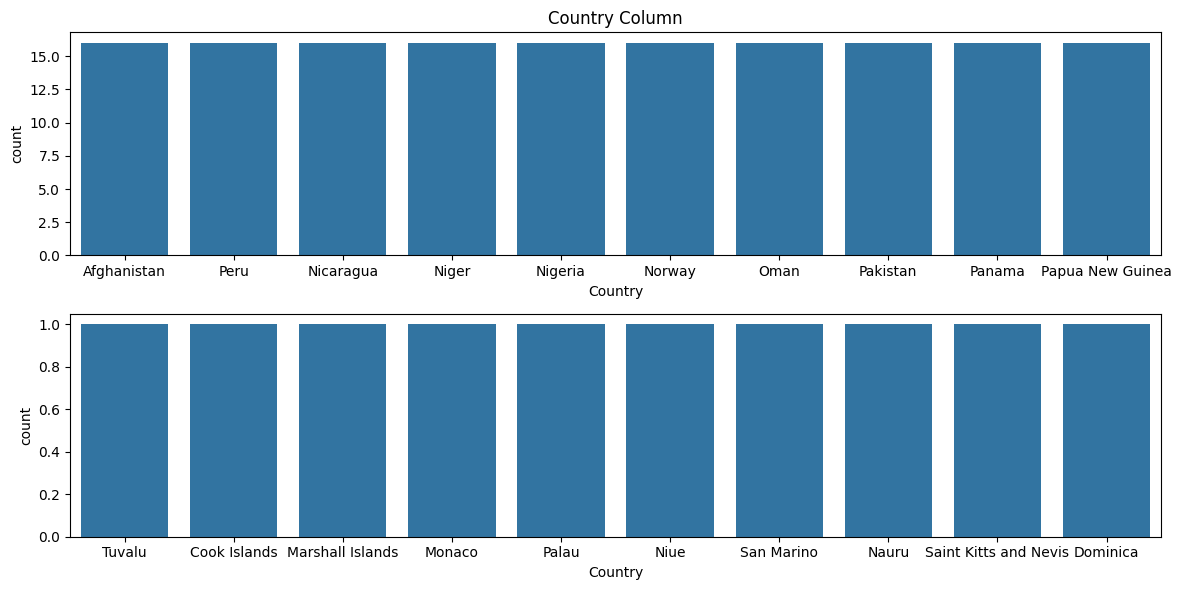

In [13]:
fig,axs=plt.subplots(2, 1, figsize=(12, 6))
sns.countplot(x='Country',data=df,ax=axs[0],order=df['Country'].value_counts().index[:10])
axs[0].set_title('Country Column')
sns.countplot(x='Country',data=df,ax=axs[1],order=df['Country'].value_counts().index[183:])
plt.tight_layout()
plt.show()

In [14]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [15]:
df['Status'].isna().sum()

0

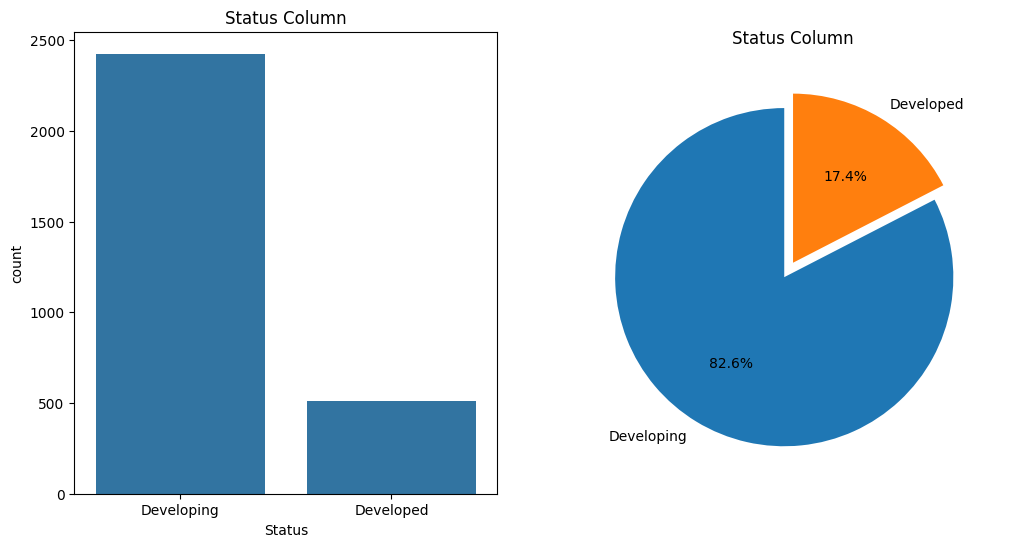

In [16]:
fig,axs=plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Status',data=df,ax=axs[0])
axs[0].set_title('Status Column')
axs[1].pie(df['Status'].value_counts(),explode=(0.1, 0), labels=df['Status'].value_counts().index,autopct='%1.1f%%',startangle=90)
axs[1].set_title('Status Column')

plt.show()

 # Bivariate Analysis

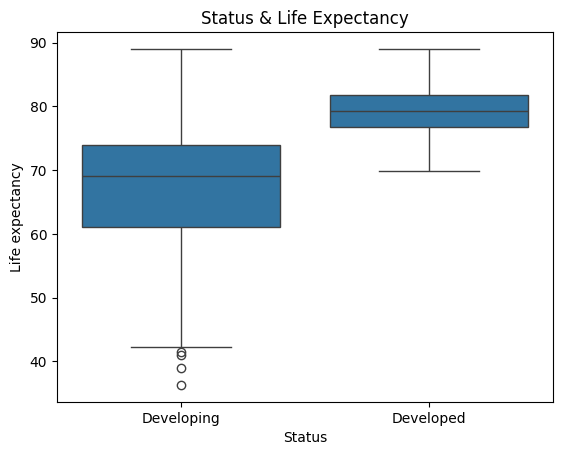

In [17]:
sns.boxplot(data=df,x='Status',y='Life expectancy')
plt.title('Status & Life Expectancy')
plt.show()

- Interquartile Range (IQR): The IQR, which represents the spread of the middle 50% of the data, is smaller for developed countries compared to developing countries. This suggests that the life expectancy in developed countries is more consistent and less variable than in developing countries.

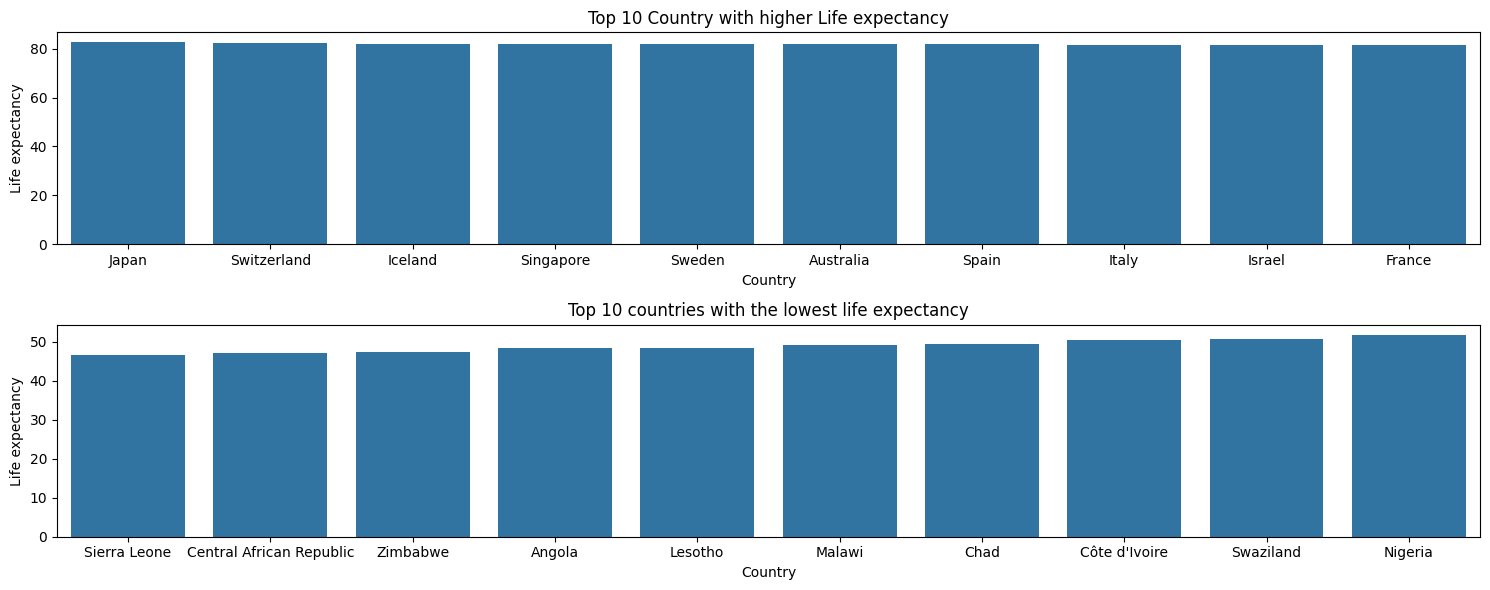

In [18]:
top_countries =df.groupby(['Country'])['Life expectancy'].median().sort_values(ascending=False).reset_index().head(10)
low_countries=df.groupby(['Country'])['Life expectancy'].median().sort_values(ascending=True).reset_index().head(10)

fig, axs = plt.subplots(2, 1, figsize=(15, 6))
sns.barplot(x='Country',y='Life expectancy',data=top_countries,ax=axs[0])
axs[0].set_title('Top 10 Country with higher Life expectancy')
sns.barplot(x='Country',y='Life expectancy',data=low_countries,ax=axs[1])
axs[1].set_title('Top 10 countries with the lowest life expectancy')
plt.tight_layout()
plt.show()

- 

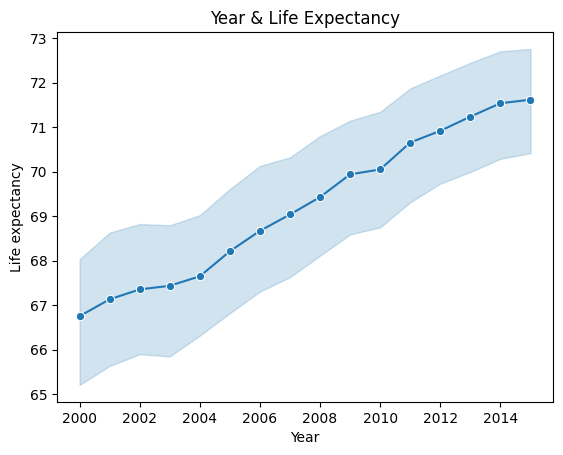

In [19]:
sns.lineplot(x='Year',y='Life expectancy',data=df,marker='o')
plt.title('Year & Life Expectancy')
plt.show()

-  that life expectancy has increased over time.

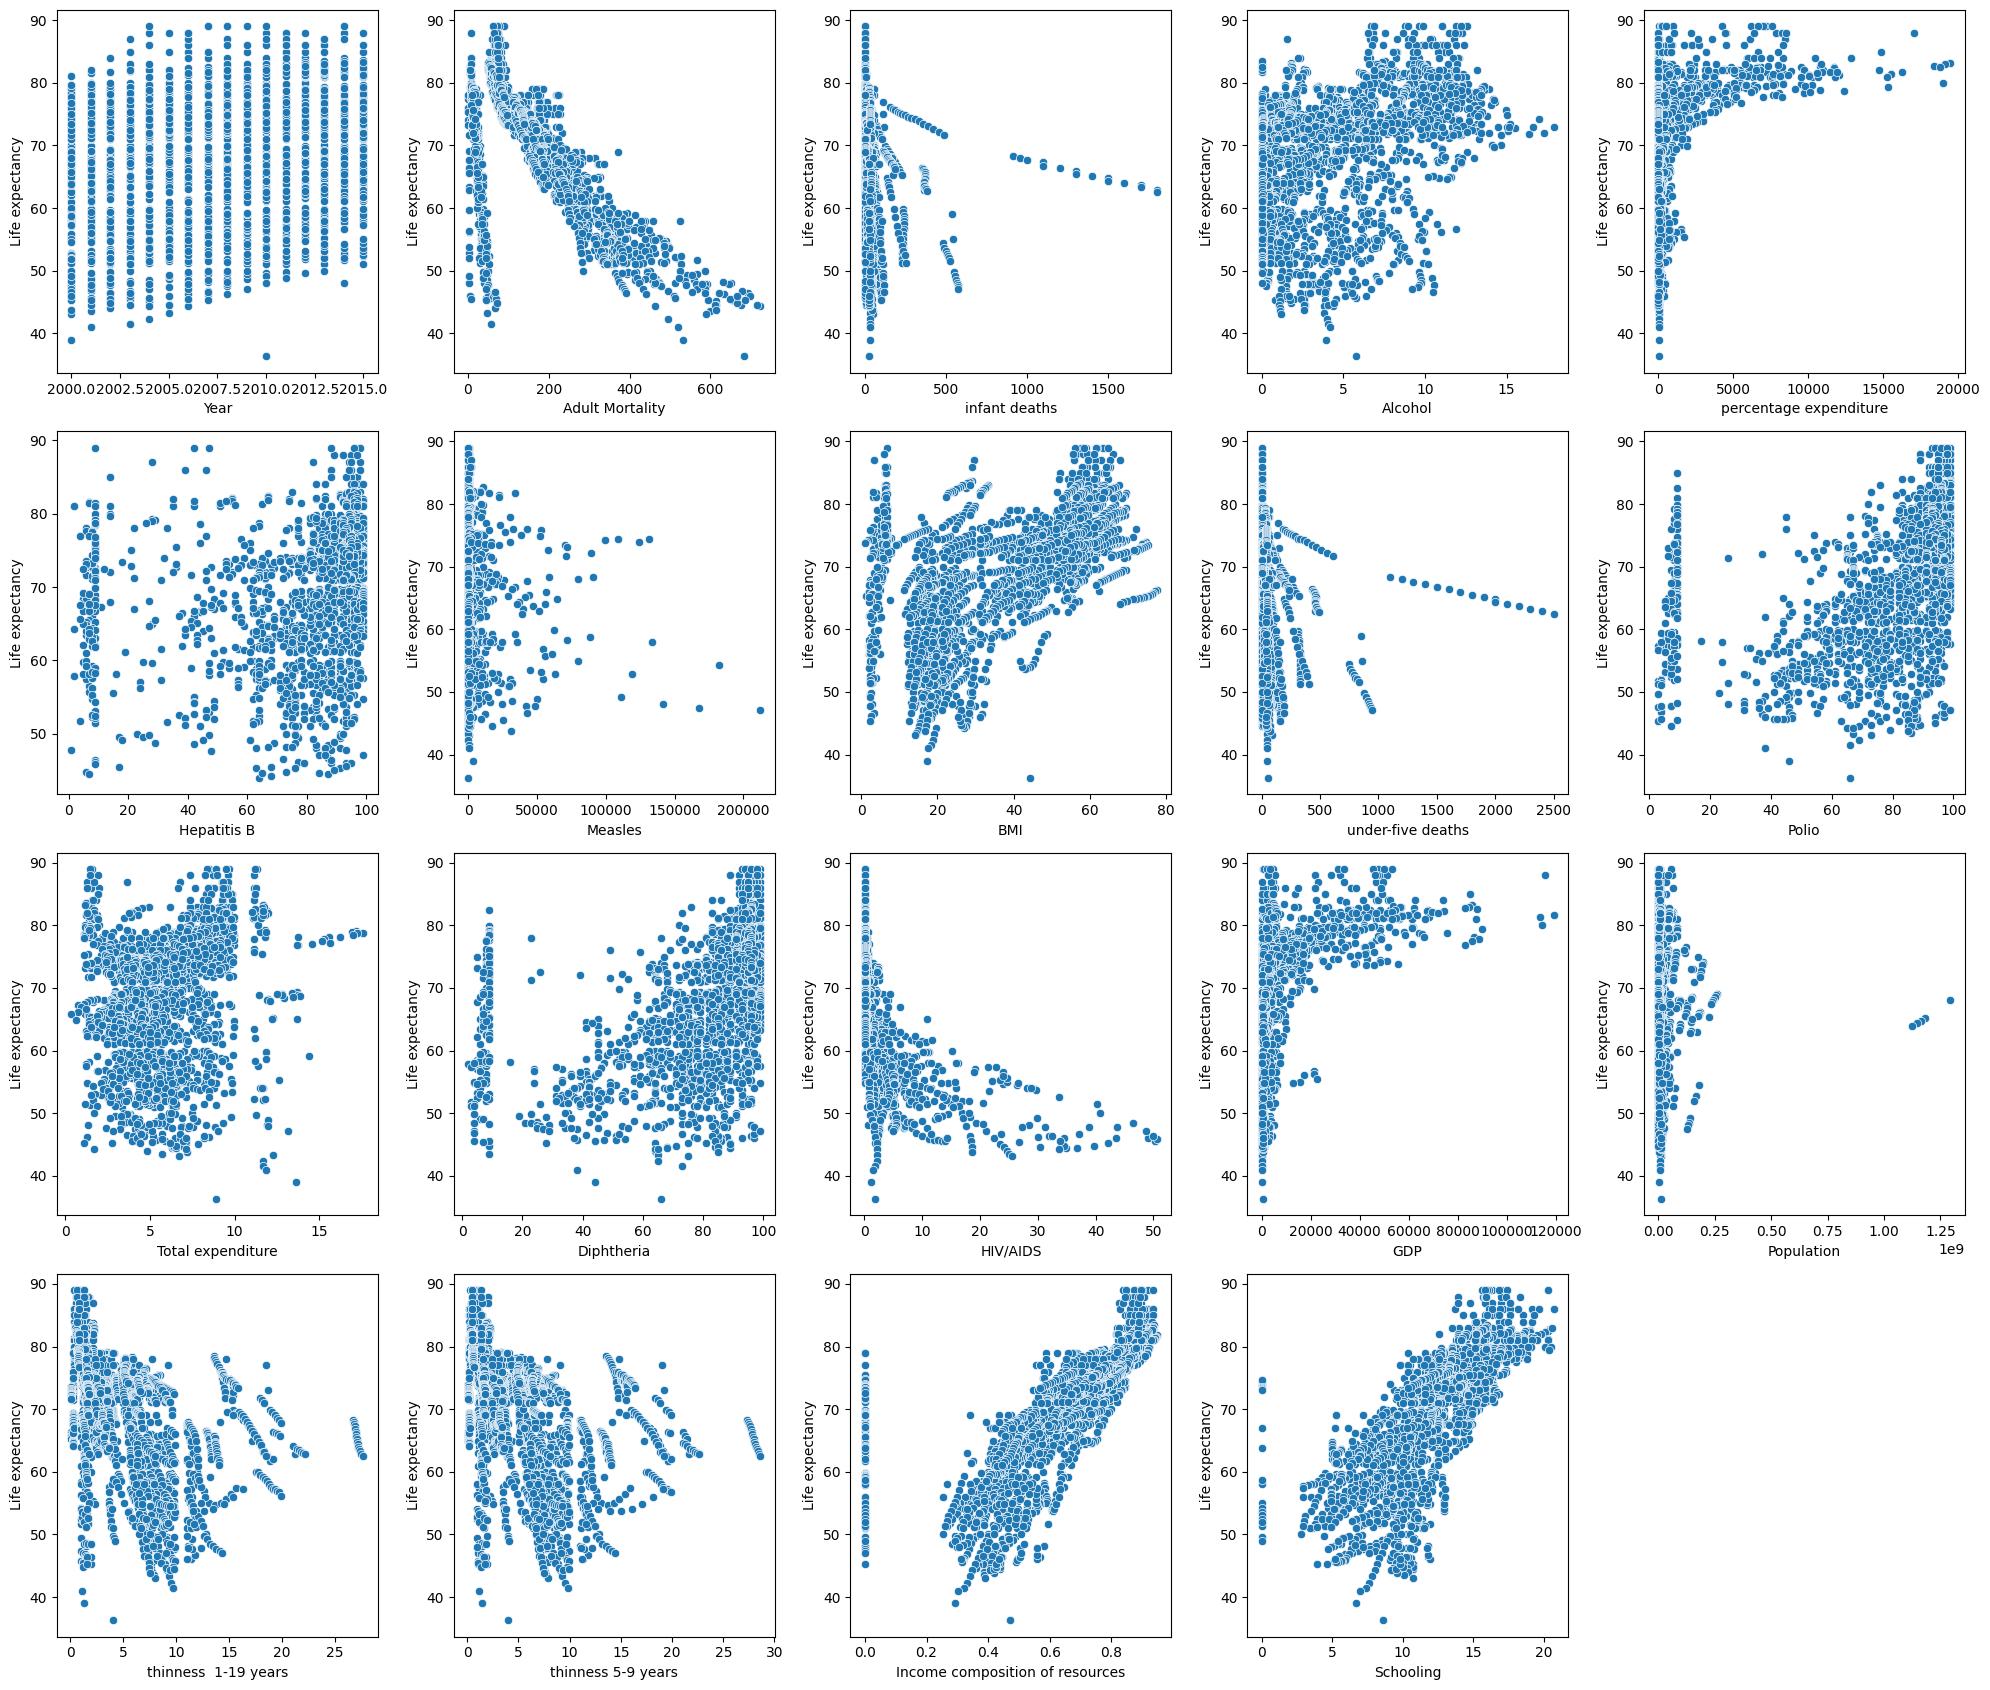

In [20]:
fig = plt.figure(figsize=(20, 17))

counter = 0
for i in df.columns:
    if df[i].dtype != 'object' and i != 'Life expectancy':
        sub = fig.add_subplot(4, 5, counter + 1)  
        g = sns.scatterplot(x=i, data=df, y='Life expectancy')
        plt.tight_layout()
        counter += 1


- There is a strong relation between Schooling and life Expectancy ,and Income composition of recources and Life Expectancy

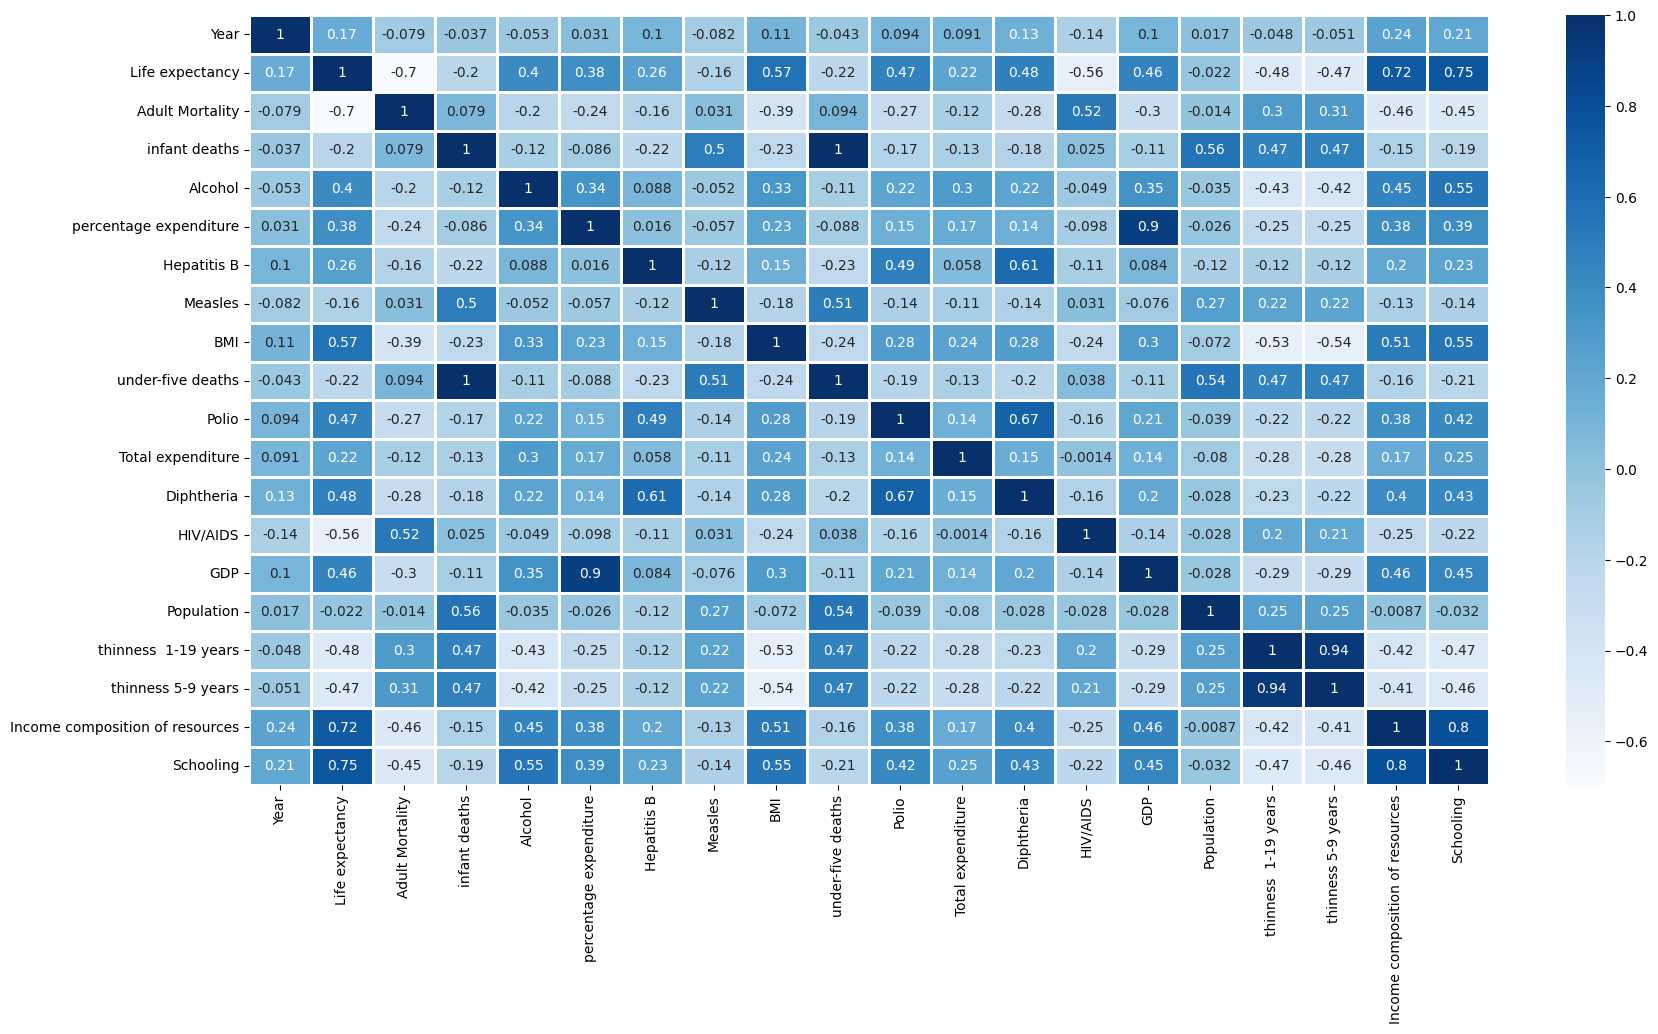

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
plt.figure(figsize=(20, 10))
sns.heatmap(data=numeric_df.corr(), cmap='Blues', linewidths=2, linecolor='white', annot=True)
plt.show()

- there is a perfect positive correlation between infant deaths and underfive deaths .
- there are strong positive relations between thinness 1-19 years and thinness 5-9 years , GDP and Percentage expendeture ,and Schooling and Income Composition of resources
- I may drop one column from these columns if they represent the same information,as keeping both will add unnecessary redundancy

# Split Data

In [22]:
df = df.dropna(subset=['Life expectancy'])


In [23]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [24]:
X = df.drop(columns=['Life expectancy'])  # Features
y = df['Life expectancy']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Preprocessing

In [25]:
X_train_copy=X_train.copy()
y_train_copy=y_train.copy()

## Feature Importance

In [26]:
# Identify numeric and categorical columns
numeric_columns = X_train_copy.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train_copy.select_dtypes(include=['object']).columns

imputer_median = SimpleImputer(strategy="median")
imputer_most_frequent = SimpleImputer(strategy="most_frequent")

X_train_copy[numeric_columns] = imputer_median.fit_transform(X_train_copy[numeric_columns])

X_train_copy[categorical_columns] = imputer_most_frequent.fit_transform(X_train_copy[categorical_columns])

# Check for remaining null values 
X_train_copy.isna().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [27]:
# Ensure y_train_copy is reshaped to 2D
y_train_copy = imputer_median.fit_transform(y_train_copy.values.reshape(-1, 1))

# Convert back to a pandas Series
y_train_copy = pd.Series(y_train_copy.flatten())

# Check for missing values in the pandas Series
y_train_copy.isna().sum()

0

In [28]:
le = LabelEncoder()
for col in categorical_columns:
    X_train_copy[col] = le.fit_transform(X_train_copy[col])

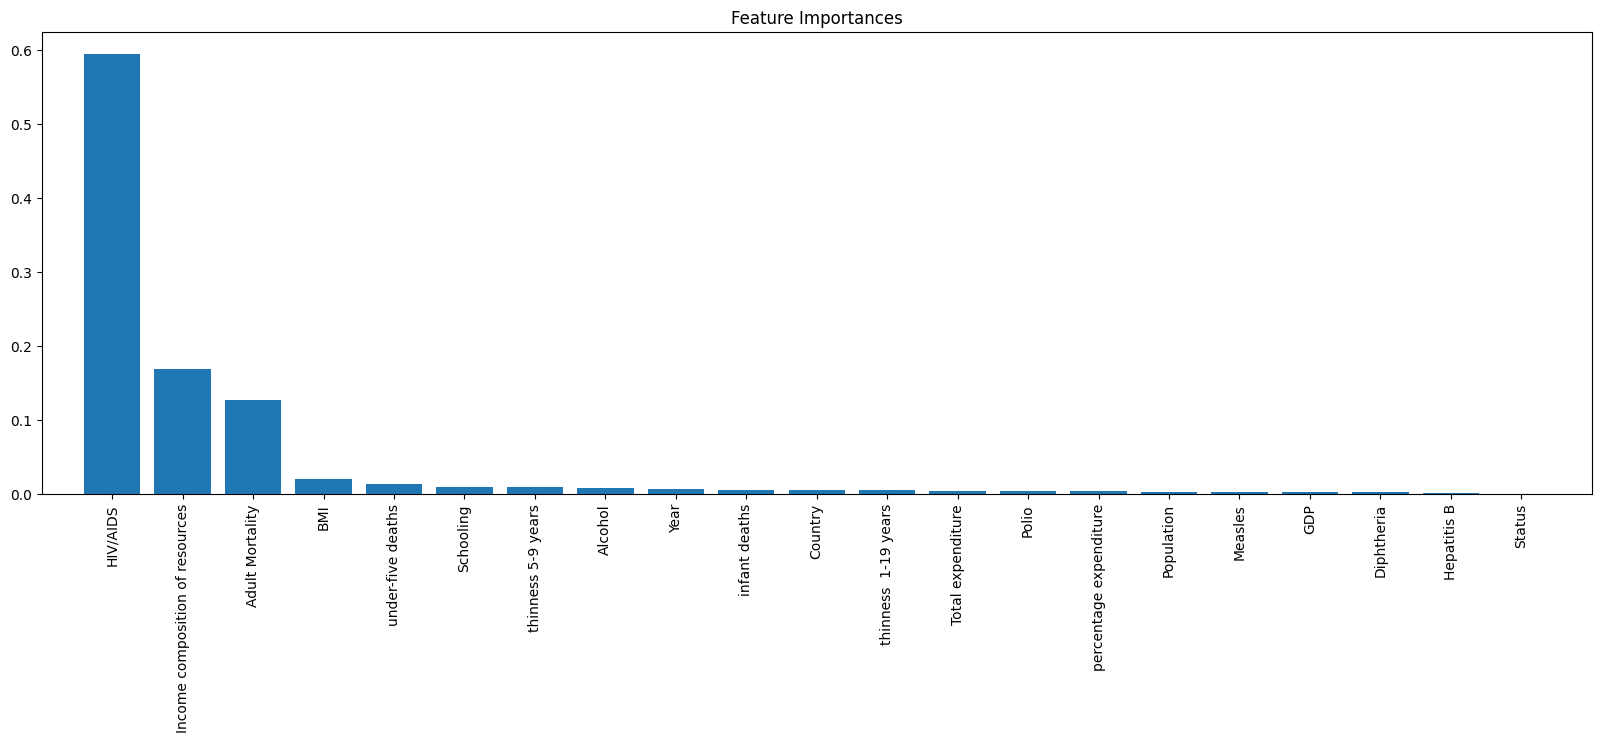

In [29]:
model = RandomForestRegressor()
model.fit(X_train_copy, y_train_copy)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting feature importance
plt.figure(figsize=(20, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_copy.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_copy.shape[1]), X_train_copy.columns[indices], rotation=90)
plt.xlim([-1, X_train_copy.shape[1]])
plt.show()


### Remove Redundant Columns

In [30]:
X_train.drop(columns=['Schooling','infant deaths','thinness  1-19 years','GDP'],inplace=True)
X_val.drop(columns=['Schooling','infant deaths','thinness  1-19 years','GDP'],inplace=True)
X_test.drop(columns=['Schooling','infant deaths','thinness  1-19 years','GDP'],inplace=True)

## Handle Skewed Columns

In [31]:
X_train_copy2=X_train.copy()

In [32]:
numerical_df = X_train_copy2.select_dtypes(include=['number'])
original_skewed=numerical_df.skew()
original_skewed

Year                               -0.006814
Adult Mortality                     1.169312
Alcohol                             0.597701
percentage expenditure              4.512307
Hepatitis B                        -1.908250
Measles                             9.402678
BMI                                -0.206544
under-five deaths                   9.418616
Polio                              -2.064445
Total expenditure                   0.606437
Diphtheria                         -2.041765
HIV/AIDS                            5.359182
Population                         17.605151
thinness 5-9 years                  1.734047
Income composition of resources    -1.097248
dtype: float64

In [33]:
col_right_skwed = ['Adult Mortality','Alcohol','percentage expenditure','Measles',
                   'under-five deaths','Total expenditure','HIV/AIDS','Population','thinness 5-9 years']
col_left_skwed = ['Hepatitis B','Polio','Diphtheria','Income composition of resources']
symmetric = ['Year','BMI']  

imputer_median = SimpleImputer(strategy="median")
# for symmetric data
imputer_mean = SimpleImputer(strategy="mean")

# Apply imputers
X_train_copy2[symmetric] = imputer_mean.fit_transform(X_train_copy2[symmetric])
X_train_copy2[col_left_skwed] = imputer_median.fit_transform(X_train_copy2[col_left_skwed])
X_train_copy2[col_right_skwed] = imputer_median.fit_transform(X_train_copy2[col_right_skwed])


### Handle Right skewed columns

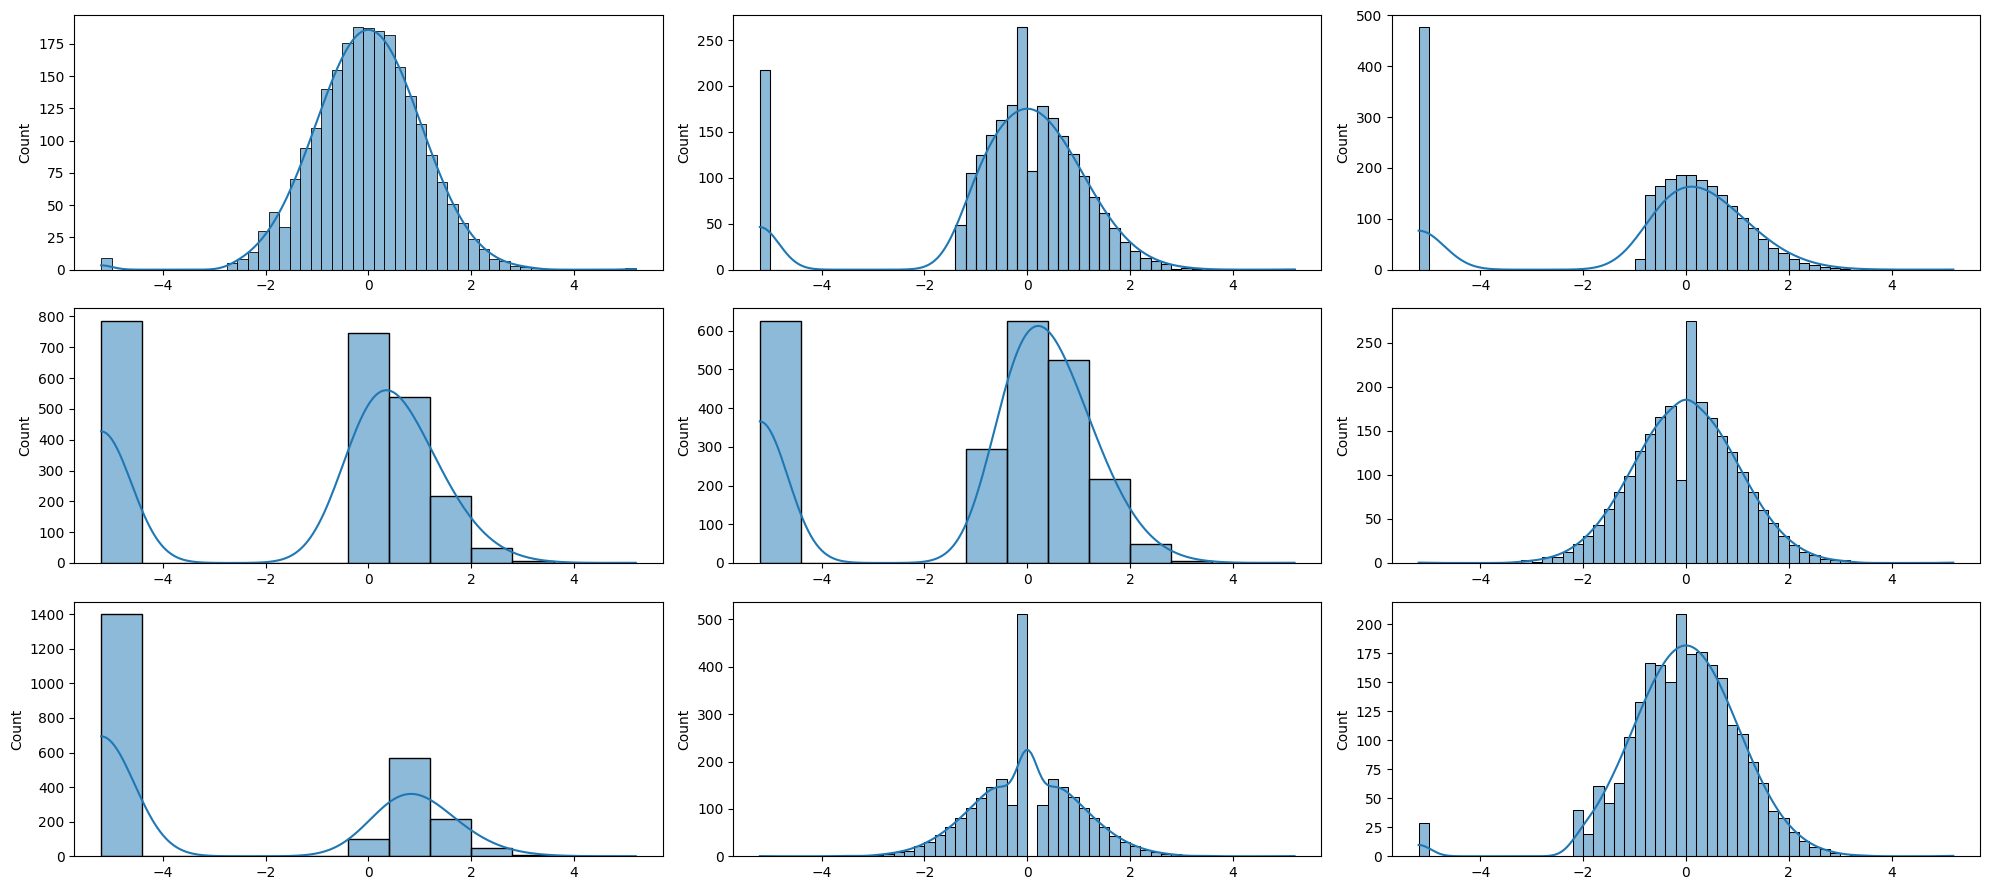

In [34]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
num_quantile_transformed = quantile_transformer.fit_transform(X_train_copy2[col_right_skwed])

fig = plt.figure(figsize=(20, 9))
counter = 1

for i in range(num_quantile_transformed.shape[1]):
    sub = fig.add_subplot(3, 3, counter)  # Adjust subplot layout
    sns.histplot(kde=True, x=num_quantile_transformed[:, i], ax=sub)  # Use NumPy slicing for the column
    plt.tight_layout()
    counter += 1

plt.show()


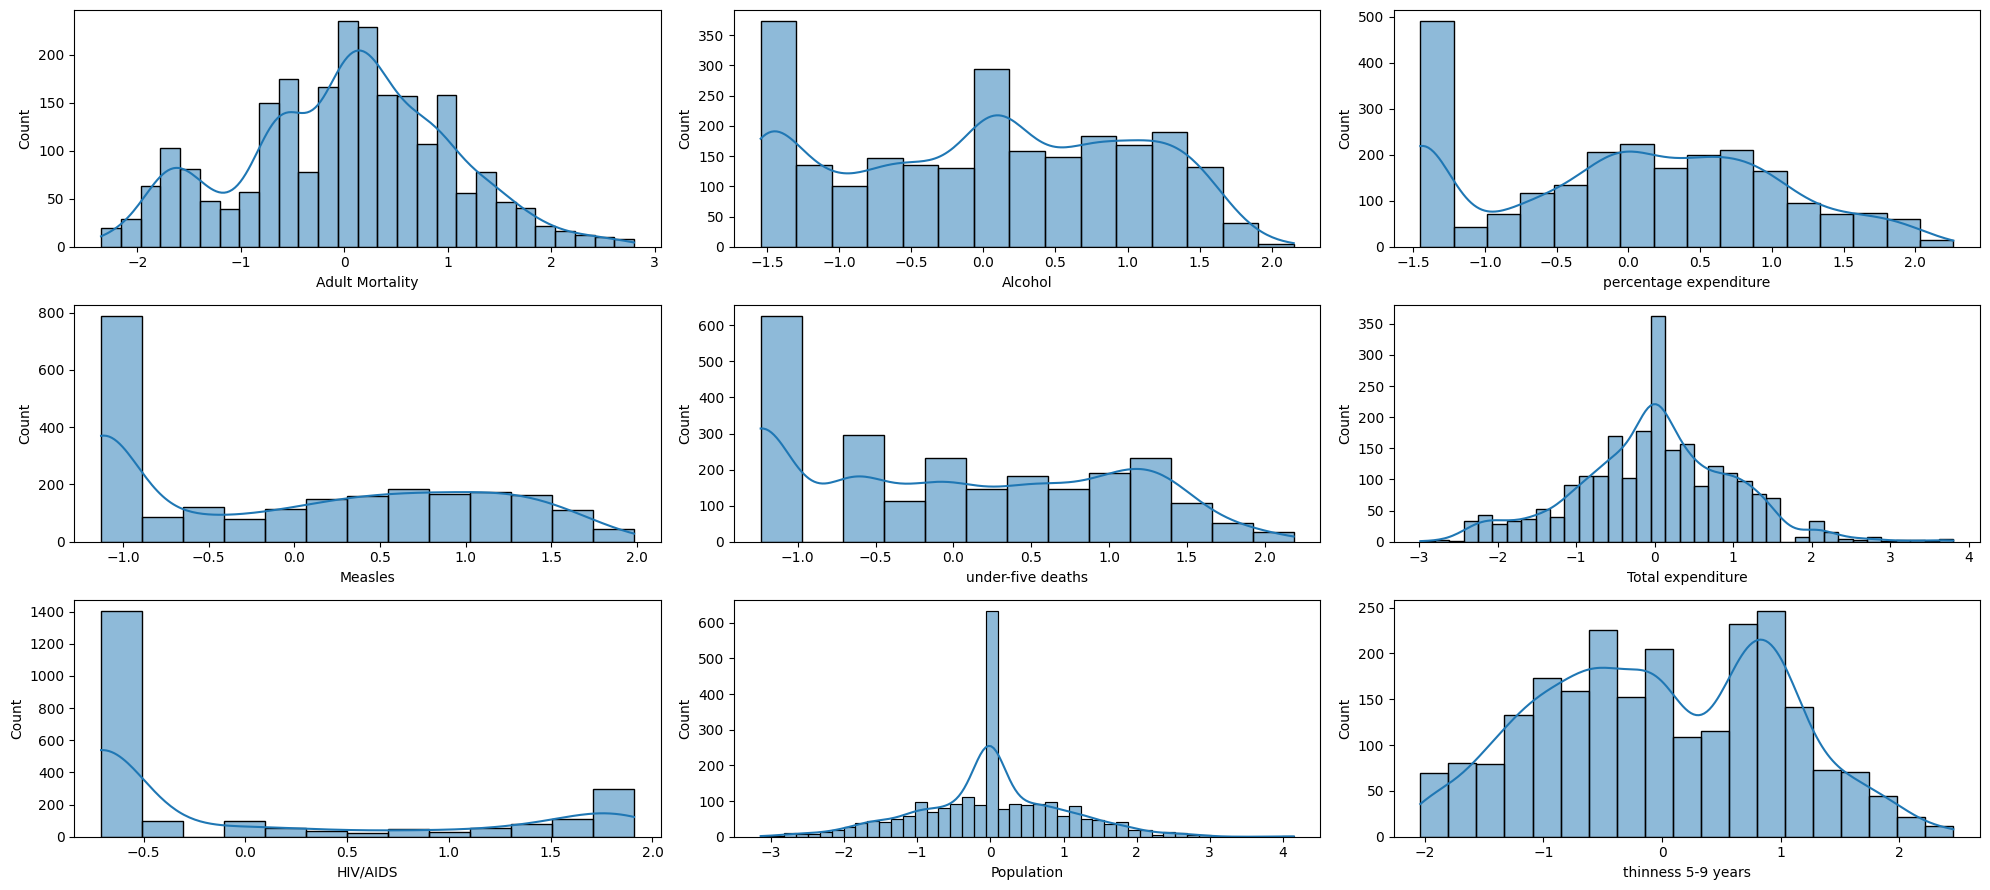

In [35]:
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
df_transformed = yeo_johnson_transformer.fit_transform(X_train_copy2[col_right_skwed])

# Create a DataFrame from the transformed data
num_yeo_transformed = pd.DataFrame(df_transformed, columns=X_train_copy2[col_right_skwed].columns)

# Create the plot
fig = plt.figure(figsize=(20, 9))
counter = 1

# Loop through columns by index
for i in range(num_yeo_transformed.shape[1]):
    sub = fig.add_subplot(3, 3, counter)  # Adjust subplot layout
    sns.histplot(kde=True, x=num_yeo_transformed.iloc[:, i], ax=sub)  # Use DataFrame indexing
    plt.tight_layout()
    counter += 1

plt.show()

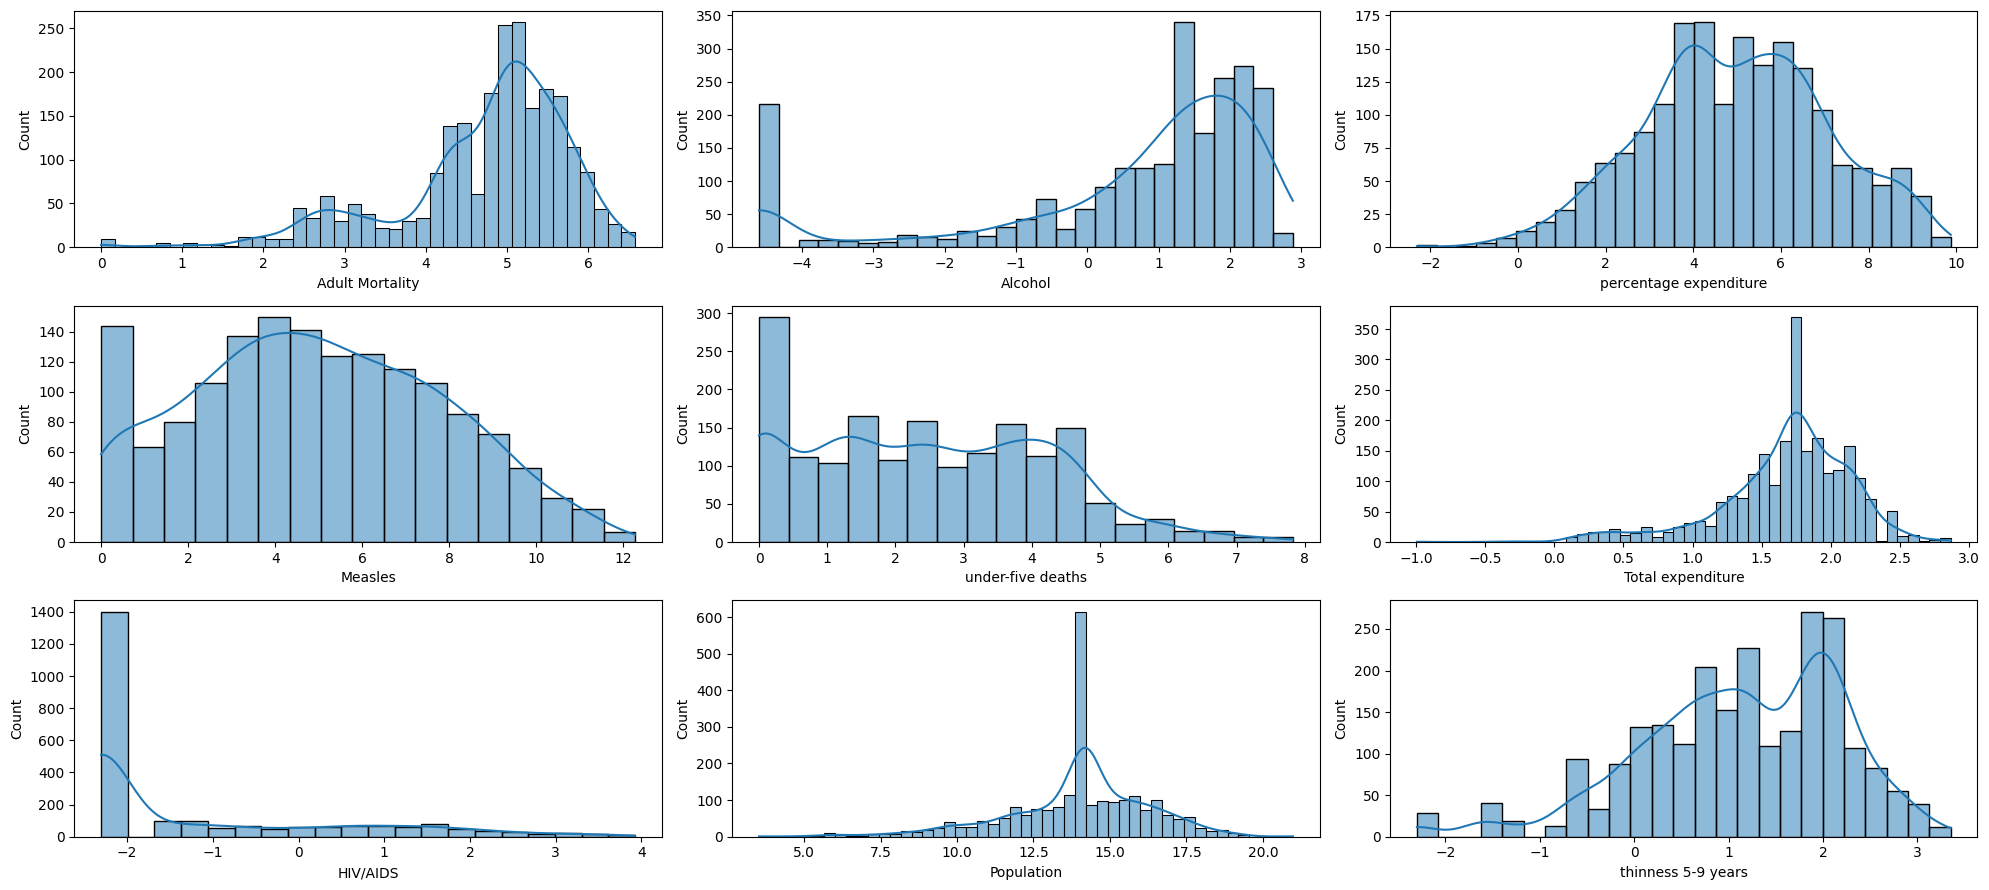

In [36]:
# Log Transformation
df_log = pd.DataFrame(X_train_copy2[col_right_skwed].apply(lambda x: np.log(x)))

# Plot for Log Transformation
fig = plt.figure(figsize=(20, 9))
counter = 1

for i in range(df_log.shape[1]):
    sub = fig.add_subplot(3,3, counter)
    sns.histplot(kde=True, x=df_log.iloc[:, i], ax=sub)
    plt.tight_layout()
    counter += 1

plt.show()


In [37]:
original_skewness = X_train_copy[col_right_skwed].skew()
quantile_skewness = pd.DataFrame(num_quantile_transformed, columns=col_right_skwed).skew()
yeo_johnson_skewness = num_yeo_transformed.skew()
log_skewness = df_log.skew()
skewness_df = pd.DataFrame({
    'Original_Skewness': original_skewness,
    'Quantile_Transformer_Skewness': quantile_skewness,
    'Yeo_Johnson_Skewness': yeo_johnson_skewness,
    'Log_Transformer_Skewness': log_skewness
})
# Step 6: Add a column for the best transformation based on which transformation minimizes skewness
skewness_df['Best_Transformation'] = skewness_df[['Original_Skewness', 'Quantile_Transformer_Skewness', 
                                                   'Yeo_Johnson_Skewness', 'Log_Transformer_Skewness']].abs().idxmin(axis=1)

skewness_df

,Original_Skewness,Quantile_Transformer_Skewness,Yeo_Johnson_Skewness,Log_Transformer_Skewness,Best_Transformation
Adult Mortality,1.169312,-0.329718,-0.077132,-1.269978,Yeo_Johnson_Skewness
Alcohol,0.659845,-1.721063,-0.082600,-1.495006,Yeo_Johnson_Skewness
percentage expenditure,4.512307,-1.142192,-0.015793,NaN,Yeo_Johnson_Skewness
Measles,9.402678,-0.556720,0.183733,NaN,Yeo_Johnson_Skewness
under-five deaths,9.418616,-0.847073,0.165958,NaN,Yeo_Johnson_Skewness
Total expenditure,0.650704,-0.001281,0.021212,-1.060485,Quantile_Transformer_Skewness
HIV/AIDS,5.359182,0.449480,0.949978,1.256241,Quantile_Transformer_Skewness
Population,19.810033,-0.003601,0.034500,-0.770610,Quantile_Transformer_Skewness
thinness 5-9 years,1.751480,-0.955554,0.013498,-0.656453,Yeo_Johnson_Skewness


- Apply quantile trnasformer for population,Total ependiture,HIV/AIDS columns
- Apply yeo johnson transformer for The rest columns in tight skewed columns

### Handle Left Skewed Columns

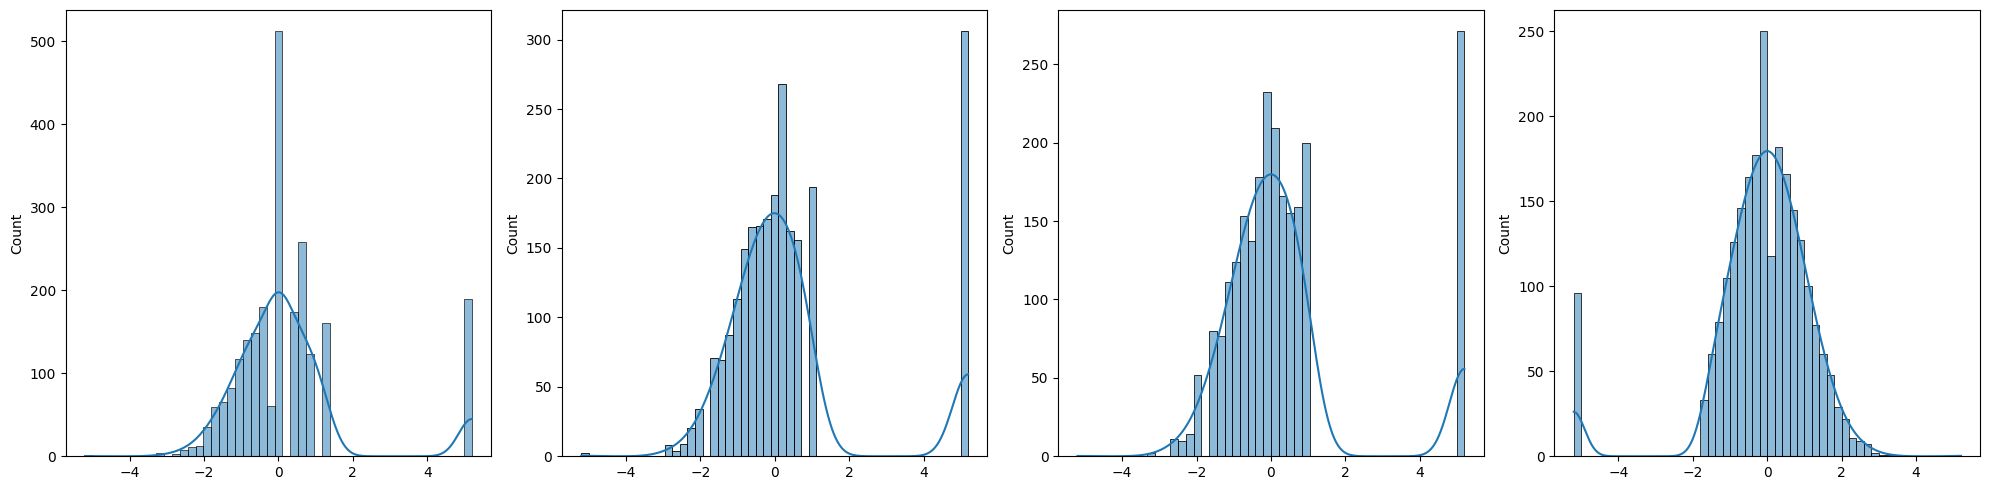

In [38]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
num_quantile_transformed = quantile_transformer.fit_transform(X_train_copy2[col_left_skwed])

fig = plt.figure(figsize=(20,5))
counter = 1

for i in range(num_quantile_transformed.shape[1]):
    sub = fig.add_subplot(1,4, counter)  # Adjust subplot layout
    sns.histplot(kde=True, x=num_quantile_transformed[:, i], ax=sub)  # Use NumPy slicing for the column
    plt.tight_layout()
    counter += 1

plt.show()


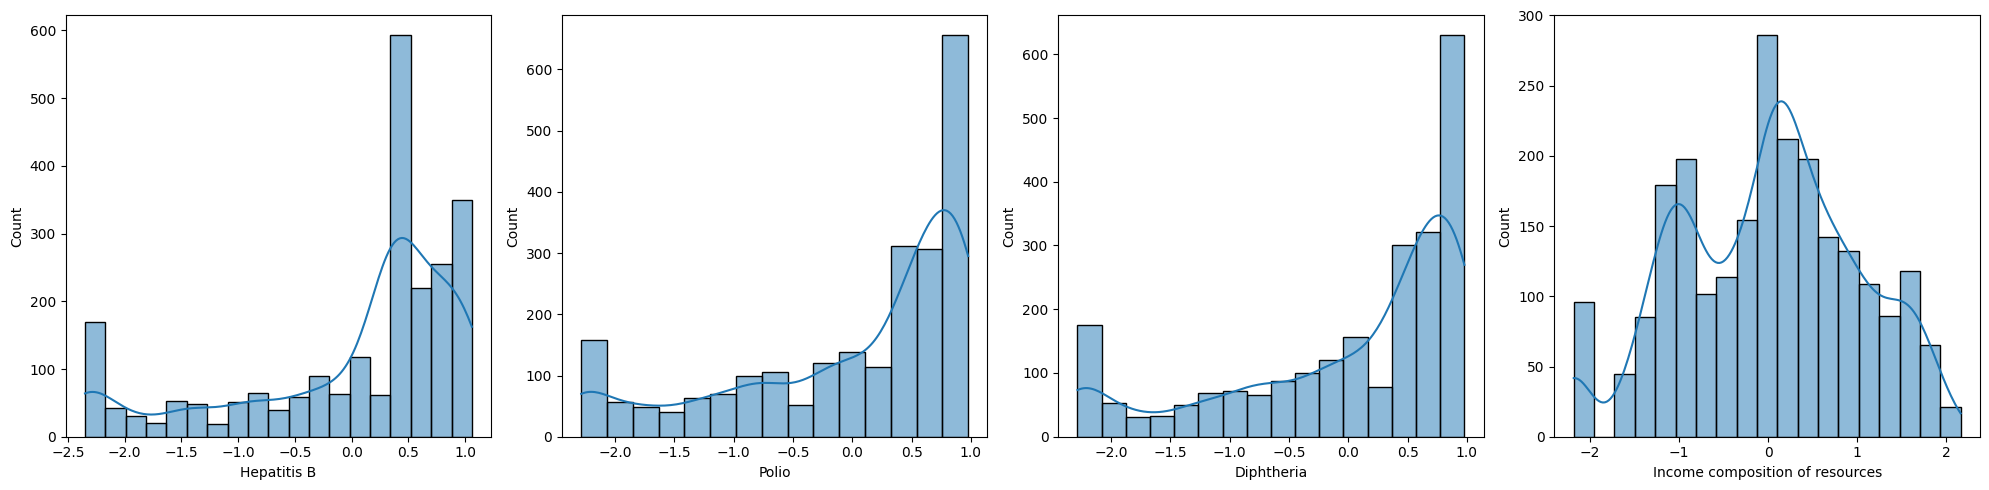

In [39]:
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
df_transformed = yeo_johnson_transformer.fit_transform(X_train_copy2[col_left_skwed])

# Create a DataFrame from the transformed data
num_yeo_transformed = pd.DataFrame(df_transformed, columns=X_train_copy2[col_left_skwed].columns)

# Create the plot
fig = plt.figure(figsize=(20, 5))
counter = 1

# Loop through columns by index
for i in range(num_yeo_transformed.shape[1]):
    sub = fig.add_subplot(1,4, counter)  # Adjust subplot layout
    sns.histplot(kde=True, x=num_yeo_transformed.iloc[:, i], ax=sub)  # Use DataFrame indexing
    plt.tight_layout()
    counter += 1

plt.show()

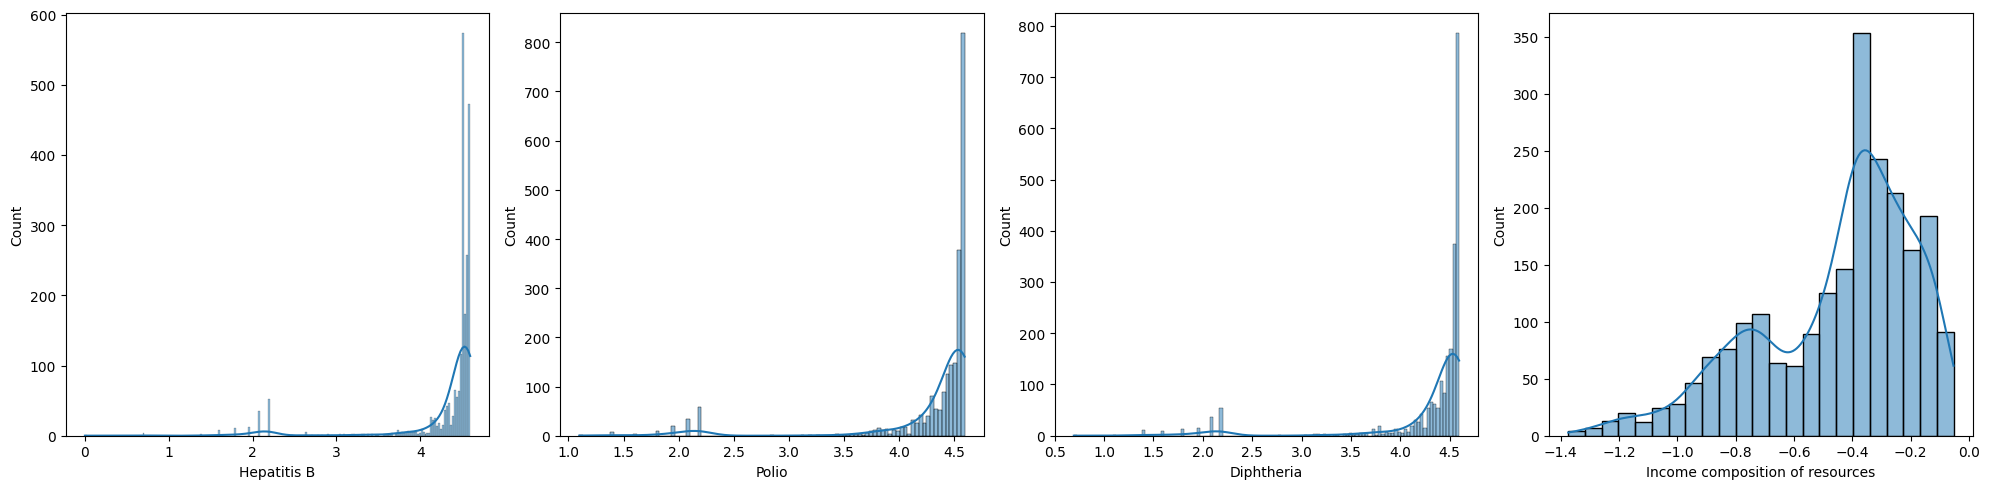

In [40]:
# Log Transformation
df_log = pd.DataFrame(X_train_copy2[col_left_skwed].apply(lambda x: np.log(x)))

# Plot for Log Transformation
fig = plt.figure(figsize=(20, 5))
counter = 1

for i in range(df_log.shape[1]):
    sub = fig.add_subplot(1, 4, counter)
    sns.histplot(kde=True, x=df_log.iloc[:, i], ax=sub)
    plt.tight_layout()
    counter += 1

plt.show()


In [41]:
original_skewness = X_train_copy[col_left_skwed].skew()
quantile_skewness = pd.DataFrame(num_quantile_transformed, columns=col_left_skwed).skew()
yeo_johnson_skewness = num_yeo_transformed.skew()
log_skewness = df_log.skew()
skewness_df = pd.DataFrame({
    'Original_Skewness': original_skewness,
    'Quantile_Transformer_Skewness': quantile_skewness,
    'Yeo_Johnson_Skewness': yeo_johnson_skewness,
    'Log_Transformer_Skewness': log_skewness
})
# Step 6: Add a column for the best transformation based on which transformation minimizes skewness
skewness_df['Best_Transformation'] = skewness_df[['Original_Skewness', 'Quantile_Transformer_Skewness', 
                                                   'Yeo_Johnson_Skewness', 'Log_Transformer_Skewness']].abs().idxmin(axis=1)

skewness_df

,Original_Skewness,Quantile_Transformer_Skewness,Yeo_Johnson_Skewness,Log_Transformer_Skewness,Best_Transformation
Hepatitis B,-2.260622,1.779981,-1.157651,-3.352888,Yeo_Johnson_Skewness
Polio,-2.074417,1.518534,-1.002648,-3.234977,Yeo_Johnson_Skewness
Diphtheria,-2.051763,1.611291,-1.044474,-3.134734,Yeo_Johnson_Skewness
Income composition of resources,-1.163030,-1.732899,-0.127552,NaN,Yeo_Johnson_Skewness


- All yeo johnson transformer

### Handle Target Column

In [42]:
# Reshape y to be a 2D array
y = y_train.values.reshape(-1, 1)

# 1. Quantile Transformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
y_train_quantile = quantile_transformer.fit_transform(y)

# 2. Yeo-Johnson Transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
y_train_yeo_johnson = yeo_johnson_transformer.fit_transform(y)

# 3. Log Transformation (add 1 to avoid log(0))
y_train_log = np.log1p(y)

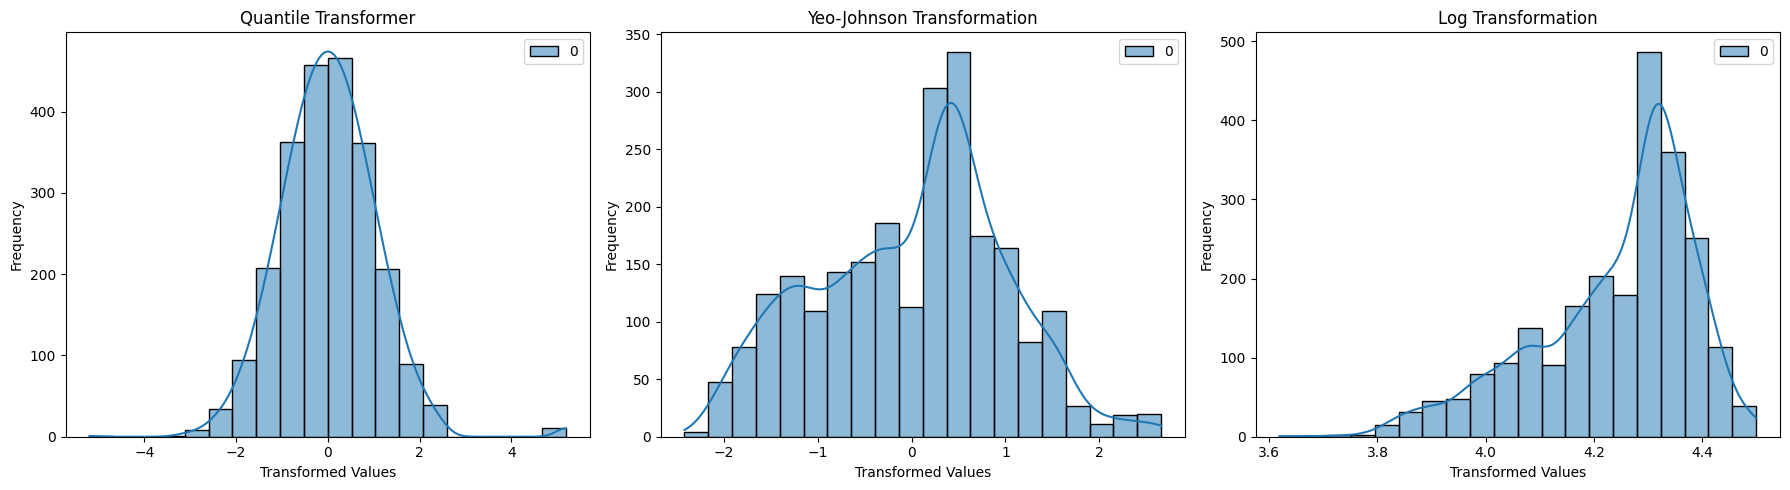

In [43]:
plt.figure(figsize=(18, 5))

# Histogram for Quantile Transformer
plt.subplot(1, 3, 1)
sns.histplot(y_train_quantile, bins=20, kde=True)
plt.title('Quantile Transformer')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

# Histogram for Yeo-Johnson Transformation
plt.subplot(1, 3, 2)
sns.histplot(y_train_yeo_johnson, bins=20, kde=True )
plt.title('Yeo-Johnson Transformation')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

# Histogram for Log Transformation
plt.subplot(1, 3, 3)
sns.histplot(y_train_log, bins=20, kde=True)
plt.title('Log Transformation')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [44]:
y = y.flatten()
y_train_quantile = y_train_quantile.flatten()
y_train_yeo_johnson = y_train_yeo_johnson.flatten()
y_log = y_train_log.flatten()
# Create a DataFrame to hold the original and transformed values
transformed_df = pd.DataFrame({
    'Original': y,
    'Quantile_Transformed': y_train_quantile,
    'Yeo_Johnson_Transformed': y_train_yeo_johnson,
    'Log_Transformed': y_log
})

# Calculate skewness for each column
skewness = transformed_df.apply(lambda x: x.skew()).to_frame(name='Skewness')
skewness.T

,Original,Quantile_Transformed,Yeo_Johnson_Transformed,Log_Transformed
Skewness,-0.618894,0.405606,-0.100511,-0.929896


## Pipline

In [45]:
'''# Create a pipeline for the target variable (y)
pipeline_y = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

# Fit and transform y_train
y_train_reshaped = y_train.values.reshape(-1, 1)  # Reshape to 2D array
y_train_r = pipeline_y.fit_transform(y_train_reshaped)

# Save the pipeline for later use
joblib.dump(pipeline_y, 'y_pipeline.pkl')

# Transform y_val and y_test using the already fitted pipeline
y_val_reshaped = y_val.values.reshape(-1, 1)
y_val_r = pipeline_y.transform(y_val_reshaped)

y_test_reshaped = y_test.values.reshape(-1, 1)
y_test_r = pipeline_y.transform(y_test_reshaped)'''





"# Create a pipeline for the target variable (y)\npipeline_y = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='median')),\n    ('transformer', PowerTransformer(method='yeo-johnson')),\n    ('scaler', StandardScaler())\n])\n\n# Fit and transform y_train\ny_train_reshaped = y_train.values.reshape(-1, 1)  # Reshape to 2D array\ny_train_r = pipeline_y.fit_transform(y_train_reshaped)\n\n# Save the pipeline for later use\njoblib.dump(pipeline_y, 'y_pipeline.pkl')\n\n# Transform y_val and y_test using the already fitted pipeline\ny_val_reshaped = y_val.values.reshape(-1, 1)\ny_val_r = pipeline_y.transform(y_val_reshaped)\n\ny_test_reshaped = y_test.values.reshape(-1, 1)\ny_test_r = pipeline_y.transform(y_test_reshaped)"

In [46]:
'''
# Reshape y_train, y_val, and y_test to 2D arrays
y_train_reshaped = y_train.values.reshape(-1, 1)

# 1. Handle y_train - impute missing values and transform the target variable
y_train_imputer = SimpleImputer(strategy='median', add_indicator=True)
y_train_imputed = y_train_imputer.fit_transform(y_train_reshaped)

# Save the imputer for later use
joblib.dump(y_train_imputer, 'y_imputer.pkl')

y_train_transformer = PowerTransformer(method='yeo-johnson')
y_train_r = y_train_transformer.fit_transform(y_train_imputed)

# Save the transformer for later use
joblib.dump(y_train_transformer, 'y_transformer.pkl')

# 2. Handle y_val - use the already fitted imputer and transformer
y_val_reshaped = y_val.values.reshape(-1, 1)
y_val_imputed = y_train_imputer.transform(y_val_reshaped)  # Use the imputer fitted on y_train
y_val_r = y_train_transformer.transform(y_val_imputed)  # Use the transformer fitted on y_train

# 3. Handle y_test - use the already fitted imputer and transformer
y_test_reshaped = y_test.values.reshape(-1, 1)
y_test_imputed = y_train_imputer.transform(y_test_reshaped)  # Use the imputer fitted on y_train
y_test_r = y_train_transformer.transform(y_test_imputed)  # Use the transformer fitted on y_train
'''



"\n# Reshape y_train, y_val, and y_test to 2D arrays\ny_train_reshaped = y_train.values.reshape(-1, 1)\n\n# 1. Handle y_train - impute missing values and transform the target variable\ny_train_imputer = SimpleImputer(strategy='median', add_indicator=True)\ny_train_imputed = y_train_imputer.fit_transform(y_train_reshaped)\n\n# Save the imputer for later use\njoblib.dump(y_train_imputer, 'y_imputer.pkl')\n\ny_train_transformer = PowerTransformer(method='yeo-johnson')\ny_train_r = y_train_transformer.fit_transform(y_train_imputed)\n\n# Save the transformer for later use\njoblib.dump(y_train_transformer, 'y_transformer.pkl')\n\n# 2. Handle y_val - use the already fitted imputer and transformer\ny_val_reshaped = y_val.values.reshape(-1, 1)\ny_val_imputed = y_train_imputer.transform(y_val_reshaped)  # Use the imputer fitted on y_train\ny_val_r = y_train_transformer.transform(y_val_imputed)  # Use the transformer fitted on y_train\n\n# 3. Handle y_test - use the already fitted imputer and tra

In [48]:
'''print("y_train shape after transformation:", y_train_r.shape)
print("y_val shape after transformation:", y_val_r.shape)
print("y_test shape after transformation:", y_test_r.shape)'''

'print("y_train shape after transformation:", y_train_r.shape)\nprint("y_val shape after transformation:", y_val_r.shape)\nprint("y_test shape after transformation:", y_test_r.shape)'

In [49]:
quantile_columns = [  'Population', 'Total expenditure', 'HIV/AIDS']
yeo_johnson_columns = [ 'Income composition of resources',  
                           'percentage expenditure', 'under-five deaths', 
                           'thinness 5-9 years', 'Diphtheria', 'Polio', 'Measles', 
                           'Hepatitis B', 'Alcohol', 'Adult Mortality']
categorical_columns = ['Country', 'Status']
symmetric_columns=['BMI','Year']

quantile_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('transformer', QuantileTransformer(output_distribution='normal')),
        ('scaler', StandardScaler())
    ])

yeo_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('transformer', PowerTransformer(method='yeo-johnson')),
        ('scaler', StandardScaler())
    ])
    
symmetric_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))    ])

full_pipeline = ColumnTransformer(
        transformers=[
            ('quantile', quantile_pipeline, quantile_columns),
            ('yeo', yeo_pipeline, yeo_johnson_columns),
             ('symmetric', symmetric_pipeline, symmetric_columns),
            ('categorical', categorical_pipeline, categorical_columns)
        ]
    )


In [50]:
X_train_r = full_pipeline.fit_transform(X_train)
X_val_r = full_pipeline.transform(X_val)
X_test_r = full_pipeline.transform(X_test)

# Modeling

In [54]:


# Define individual models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost Regression': AdaBoostRegressor()
}

# Define stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('ridge', Ridge()),
        ('rf', RandomForestRegressor()),
        ('gb', GradientBoostingRegressor()),
        ('xgb', XGBRegressor()),
        ('ada', AdaBoostRegressor())
    ],
    final_estimator=RandomForestRegressor()  # Final model in stacking
)

# Define voting model
voting_model = VotingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('ridge', Ridge()),
        ('rf', RandomForestRegressor()),
        ('gb', GradientBoostingRegressor()),
        ('xgb', XGBRegressor()),
        ('ada', AdaBoostRegressor())
    ]
)

# Add stacking and voting models to the dictionary
models['Stacking Regressor'] = stacking_model
models['Voting Regressor'] = voting_model

results = []

# Evaluate each model
for name, model in models.items():
    predict = cross_val_predict(model, X_train_r, y_train, cv=3)    
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_train, predict)
    mse = mean_squared_error(y_train, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, predict)
    
    results.append({
        "Model Name": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    })

# Create a DataFrame to show results
results_df = pd.DataFrame(results)

# Display results
results_df

,Model Name,MAE,MSE,RMSE,R² Score
0,Linear Regression,3.219700,18.008198,4.243607,0.803594
1,Ridge Regression,3.219535,18.007871,4.243568,0.803597
2,Random Forest,1.287901,4.130668,2.032405,0.954949
3,Gradient Boosting,1.612003,5.234972,2.288006,0.942905
4,XGBoost,1.320269,4.303713,2.074539,0.953062
5,AdaBoost Regression,2.461155,9.938311,3.152509,0.891608
6,Stacking Regressor,1.294263,4.030362,2.007576,0.956043
7,Voting Regressor,1.840741,6.603241,2.569677,0.927982


In [55]:
X_train_r.shape

(2342, 17)

## Fine-Tuning for XGBoost

In [56]:

# Define the model
model = XGBRegressor(eval_metric='rmse')

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),              
    'max_depth': np.arange(3, 10),                       
    'learning_rate': np.linspace(0.01, 0.2, 10),         
    'subsample': np.linspace(0.5, 1.0, 6),              
    'colsample_bytree': np.linspace(0.5, 1.0, 6),       
    'gamma': np.linspace(0, 0.3, 6),                     
}

# Set up RandomizedSearchCV with cross-validation (cv=3)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_r, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_model.predict(X_val_r)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print results
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.03111111111111111, 'gamma': 0.12, 'colsample_bytree': 0.6}
MSE: 2.7131
MAE: 1.8407
R² Score: 0.9696


## Fine-Tuning for Gradient Boosting 

In [57]:

# Define base models
estimators = [
    ('lr', LinearRegression()),
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor()),
    ('xgb', XGBRegressor()),
    ('ada', AdaBoostRegressor())
]

# Define the Stacking Regressor with a meta-model (e.g., RandomForestRegressor)
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor()
)

# Define hyperparameters for the final estimator (meta-model)
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__max_depth': [3, 5, 7],
    'final_estimator__min_samples_split': [2, 5, 10],
    'final_estimator__min_samples_leaf': [1, 2, 4],
    'final_estimator__bootstrap': [True, False]
}

# Perform RandomizedSearchCV to tune the hyperparameters
random_search = RandomizedSearchCV(
    estimator=stacking_model,
    param_distributions=param_grid,
    n_iter=10,  # You can increase this for a more thorough search
    scoring='neg_mean_squared_error',
    cv=3, 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_r, y_train)

# Get the best estimator and predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val_r)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# Display best parameters and evaluation metrics
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'final_estimator__n_estimators': 50, 'final_estimator__min_samples_split': 10, 'final_estimator__min_samples_leaf': 4, 'final_estimator__max_depth': 5, 'final_estimator__bootstrap': True}
MAE: 1.0554
MSE: 2.6166
RMSE: 1.6176
R² Score: 0.9707


## Fine-Tuning for RandomForestRegressor

In [58]:
# Define the model
model = RandomForestRegressor()

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),       
    'max_depth': np.arange(3, 21, 2),                
    'min_samples_split': np.arange(2, 21, 2),        
    'min_samples_leaf': np.arange(1, 11),            
    'max_features': ['auto', 'sqrt', 'log2'],        
    'bootstrap': [True, False],                    
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_r, y_train)

# Get the best model from the random search
best_model_rondomforest = random_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_model_rondomforest.predict(X_val_r)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print results
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': False}
MSE: 2.9030
MAE: 1.0554
R² Score: 0.9675


# Evaluation

In [59]:
predict=best_model_rondomforest.predict(X_test_r)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)
final=[]
final.append({
        "MAE": mae,
        "R² Score": r2
    })

finalresult = pd.DataFrame(final)
finalresult

,MAE,R² Score
0,0.992491,0.970369


# Final Pipline

In [60]:
# Parameters from your RandomizedSearchCV result
best_model_rondomforest = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=6,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=13,
    bootstrap=False,
    random_state=42
)

# Set up preprocessing pipelines as before
quantile_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', QuantileTransformer(output_distribution='normal')),
    ('scaler', StandardScaler())
])

yeo_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

symmetric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

full_pipeline = ColumnTransformer(transformers=[
    ('quantile', quantile_pipeline, quantile_columns),
    ('yeo', yeo_pipeline, yeo_johnson_columns),
    ('symmetric', symmetric_pipeline, symmetric_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

# Final pipeline integrating preprocessing and the best model
final_model_pipeline = Pipeline(steps=[
    ('preprocessing', full_pipeline),
    ('model', best_model_rondomforest)
])

# Target variable preprocessing pipeline


# Fit the final model pipeline
final_model_pipeline.fit(X_train, y_train)  
joblib.dump(final_model_pipeline, 'life_expectancy_pipeline.pkl')


['life_expectancy_pipeline.pkl']